In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split                                                            # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator                                             # type: ignore
from tensorflow.keras import Input                                                                              # type: ignore
from tensorflow.keras.models import Sequential                                                                  # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout                               # type: ignore
from tensorflow.keras.regularizers import l2                                                                    # type: ignore
from sklearn.metrics import classification_report, confusion_matrix                                             # type: ignore
from tensorflow.keras.utils import load_img, img_to_array                                                       # type: ignore
from tensorflow.keras.models import Model                                                                       # type: ignore
from tensorflow.keras.preprocessing import image                                                                # type: ignore
from tensorflow.keras.layers import BatchNormalization                                                          # type: ignore
from tensorflow.keras.callbacks import ReduceLROnPlateau                                                        # type: ignore
from tensorflow.keras.callbacks import EarlyStopping                                                            # type: ignore
from tensorflow.keras.optimizers import Adam                                                                    # type: ignore
%pip install keras-tuner
from kerastuner.tuners import RandomSearch                                                                      # type: ignore
from tensorflow.keras.callbacks import ModelCheckpoint                                                          # type: ignore
from tensorflow.keras.models import load_model                                                                  # type: ignore
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input                                         # type: ignore
from tensorflow.keras.layers import GlobalAveragePooling2D                                                      # type: ignore
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input                                   # type: ignore
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input                         # type: ignore
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input                            # type: ignore
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input                                # type: ignore

In [ ]:
# Dataset Loading

# train_folder_link = 'https://drive.google.com/drive/u/1/folders/1ZrN3I-DmXXxXEUKIxidLHuJlheNMUQel'
# test_folder_link = 'https://drive.google.com/drive/u/1/folders/1BH9v4yR0buMt8-iQIzR19OycrYfGg5n7'
# from google.colab import drive
# drive.mount('/content/drive')
# train_dir = '/content/drive/MyDrive/CSE427/Project/Dataset/Train Data'
# test_dir = '/content/drive/MyDrive/CSE427/Project/Dataset/Test Data'

train_dir = 'C:/Users/T2430490/Downloads/Dataset-20250107T110206Z-001/Dataset/Train Data'
test_dir = 'C:/Users/T2430490/Downloads/Dataset-20250107T110206Z-001/Dataset/Test Data'

In [ ]:
# Preprocessing & Data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=(0.6, 1.4),
    width_shift_range=0.2,
    height_shift_range=0.2,
    channel_shift_range=10)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

print('\n',train_generator.class_indices)

Found 2270 images belonging to 2 classes.
Found 600 images belonging to 2 classes.

 {'Fit Bus': 0, 'Unfit Bus': 1}


In [ ]:
# Building Custom CNN Model


# NO-1--------------------

# A Simple Architecture

# model = Sequential([
#     Input(shape=(128, 128, 3)),
#     Conv2D(16, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
#     Flatten(),
#     Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(0.4),
#     Dense(1, activation='sigmoid')
# ])

###############################################################  MODEL UPDATE   ####################################################

# NO-2--------------------

# A Complex Architecture

# model = Sequential([
#     Input(shape=(128, 128, 3)),
#     Conv2D(32, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
#     Conv2D(64, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu',  kernel_regularizer=l2(0.01)),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

###############################################################  MODEL UPDATE   ####################################################

# NO-3--------------------

# An Optimized Architecture with Best Hyperparameters

model = Sequential([

    # Input Layer
    Input(shape=(128, 128, 3)),

    # Conv Layer 1
    Conv2D(16, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Conv Layer 2
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),                                                          #----------------The Best Custom Model----------------#

    # Conv Layer 3
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Conv Layer 4
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),

    # Dense Layer 1
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),

    # Output Layer
    Dense(1, activation='sigmoid')
])

# Compiling the model with Adam optimizer and binary crossentropy loss

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,481 (2.63 MB)

 Trainable params: 688,001 (2.62 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
# Training the model

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, lr_scheduler, checkpoint])

# Best accuracy till now = 88.67%

# Evaluate the model on test data

test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.8251 - loss: 0.5081
Epoch 1: val_loss improved from inf to 0.66556, saving model to best_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8251 - loss: 0.5082 - val_accuracy: 0.7700 - val_loss: 0.6656 - learning_rate: 0.0010
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.8094 - loss: 0.5284
Epoch 2: val_loss improved from 0.66556 to 0.41727, saving model to best_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8095 - loss: 0.5284 - val_accuracy: 0.8650 - val_loss: 0.4173 - learning_rate: 0.0010
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.8284 - loss: 0.5093
Epoch 3: val_loss did not improve from 0.41727
71/71 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8282 - loss: 0.5095 - val_accuracy: 0.8667 - val_loss: 0.4498 - learning_rate: 0.0010
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.8106 - loss: 0.5195
Epoch 4: val_loss improved

In [ ]:
# Loading the Saved Best Model

best_model = load_model('best_model.keras')

In [ ]:
# Model Architecture Tweaks & Manually Tuning the Hyperparameters

# learning_rates = [1e-5, 1e-4, 1e-3, 1e-2] ---------- Best = 1e-3

# batch size = 16, 32, 64, or 128 ----------- Best = 32

# Conv layer filters = 32, 64, 128, 256 ----------- Best = 128

# Kernel Size = (3, 3) vs (5, 5) ----------- Best = (3,3)

# dropout Rate = 0.3, 0.5, and 0.7 ----------- Best = 0.3

# optimizers = SGD, Adam, RMSprop --------- Best = Adam

# Dense Layer Size = 64, 128, and 256 ---------- Best = 128

In [ ]:
# Auto Tuning the Hyperparameters

def build_model(hp):
    model = Sequential([
        Conv2D(hp.Choice('filters', [32, 64, 128, 256]), (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)),
        Flatten(),
        Dense(hp.Choice('dense_units', [64, 128, 256]), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])), loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=20, executions_per_trial=1, directory='tuner_dir')
tuner.search(train_generator, epochs=10, validation_data=validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Filters: {best_hps.get('filters')}")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Dense Units: {best_hps.get('dense_units')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Building the best model + Training the model with the best hyperparameters + Testing the model result

best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler])

test_loss, test_acc = best_model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")

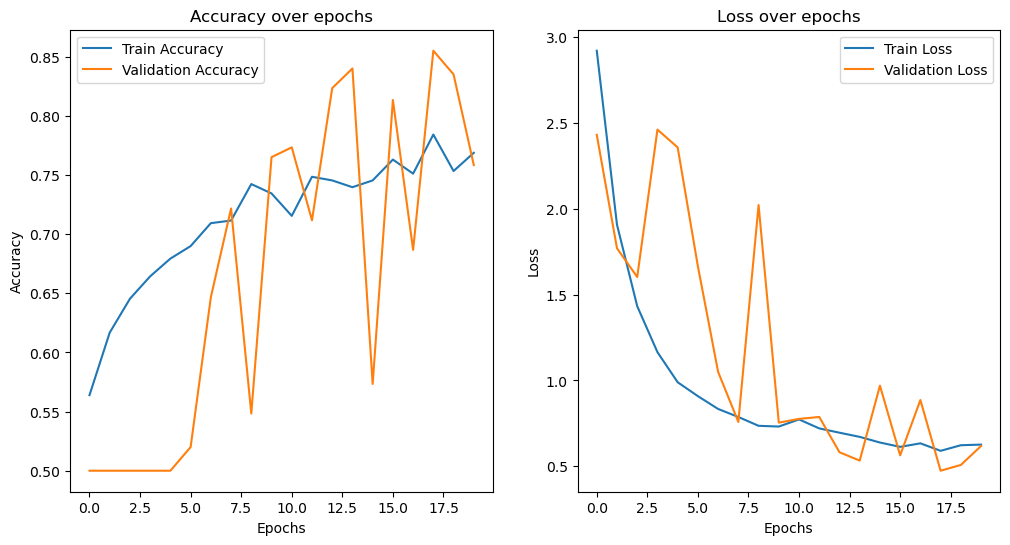

In [ ]:
# Plot training history (Accuracy and Loss)

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


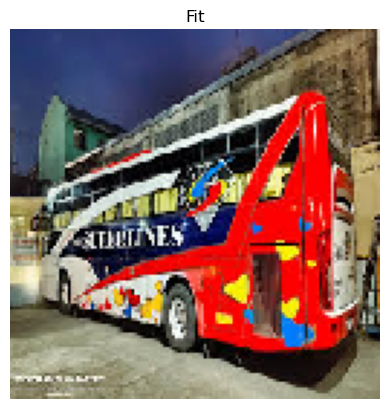

Prediction Score: 0.02459576725959778
Bus is Fit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


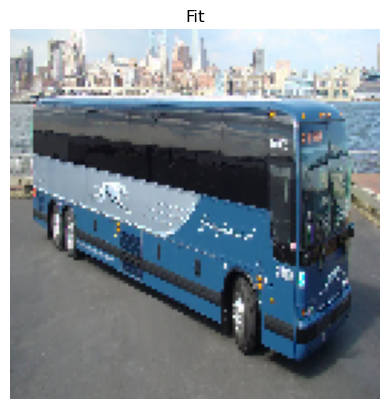

Prediction Score: 0.11451061815023422
Bus is Fit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


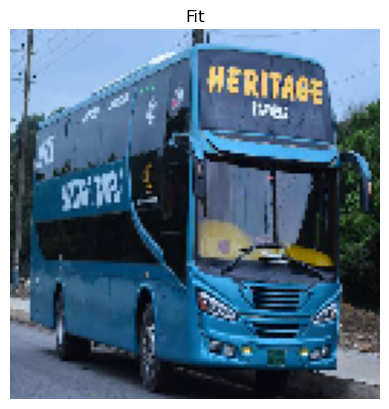

Prediction Score: 0.018434911966323853
Bus is Fit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


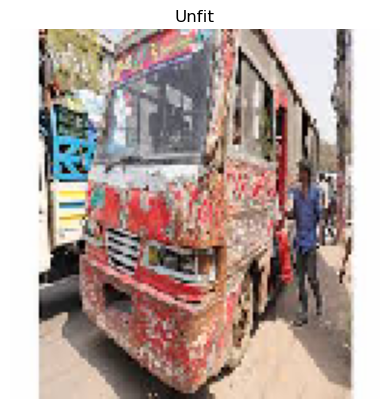

Prediction Score: 0.9939331412315369
Bus is Unfit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


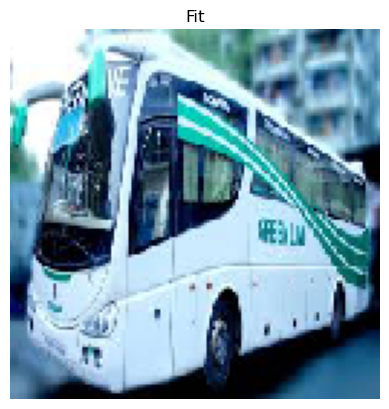

Prediction Score: 0.00010261454008286819
Bus is Fit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


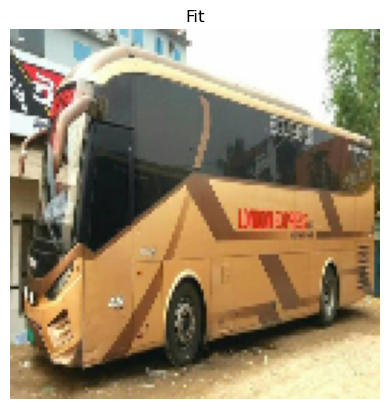

Prediction Score: 0.016306599602103233
Bus is Fit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


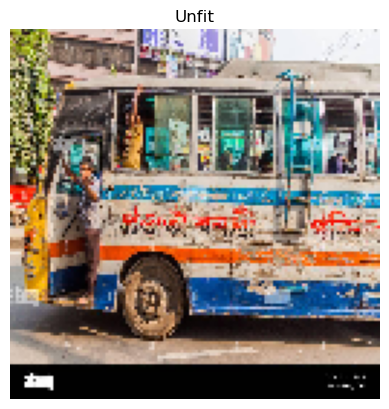

Prediction Score: 0.9996086359024048
Bus is Unfit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


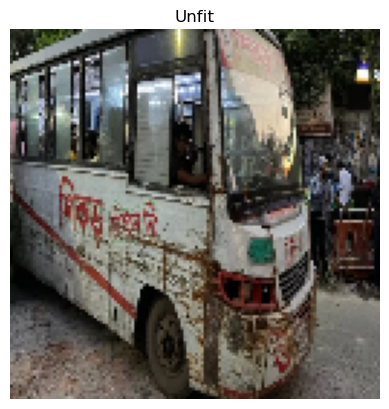

Prediction Score: 0.9865933060646057
Bus is Unfit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


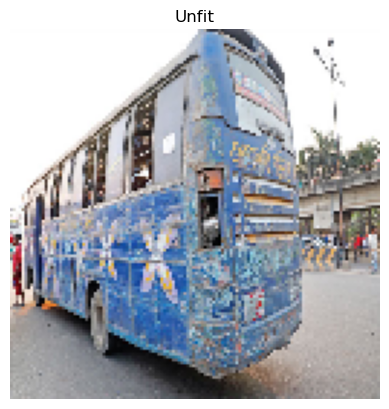

Prediction Score: 0.9847257733345032
Bus is Unfit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


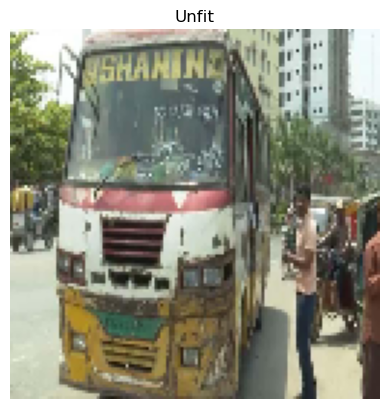

Prediction Score: 0.7581254243850708
Bus is Unfit.


In [ ]:
# Load and Preprocess Images for Live Test

image_dir = 'C:/Users/T2430490/Downloads/Dataset-20250107T110206Z-001/Dataset/Live Test'
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)
               if file.lower().endswith(('.webp', '.jfif', '.jpeg', '.jpg', '.png'))]

for i, img_path in enumerate(image_files, start=1):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Unfit" if prediction[0][0] > 0.5 else "Fit")
    plt.show()

    print(f"Prediction Score: {prediction[0][0]}")

    if prediction[0][0] > 0.5:
        print("Bus is Unfit.")
    else:
        print("Bus is Fit.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


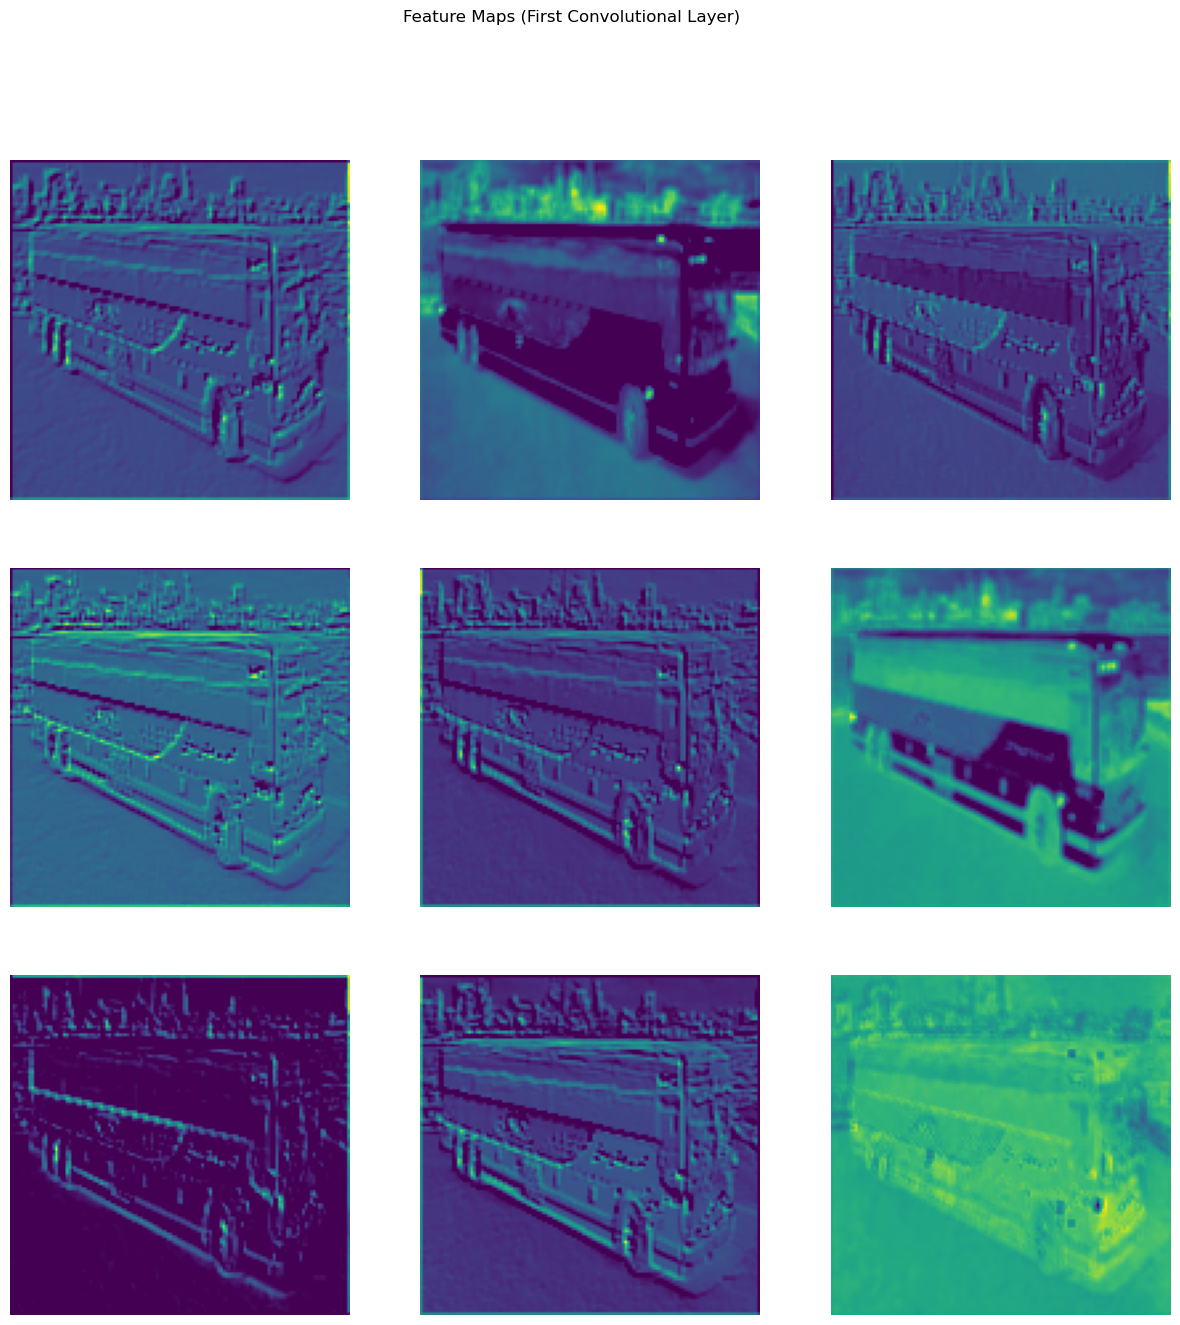

In [ ]:
# Feature Map Visualization

pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
layer_output = pretrained_model.get_layer('block1_conv1').output
activation_model = Model(inputs=pretrained_model.input, outputs=layer_output)

img = load_img(image_files[1], target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

feature_maps = activation_model.predict(img_array)
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Feature Maps (First Convolutional Layer)')
plt.show()

In [ ]:
# Classification Report and Confusion Matrix

y_pred = []
y_true = []

for images, labels in validation_generator:
    predictions = model.predict(images)
    y_pred.extend((predictions > 0.5).astype(int).flatten())
    y_true.extend(labels.astype(int))
    if len(y_true) >= validation_generator.samples:
        break

y_pred = np.array(y_pred)
y_true = np.array(y_true)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Classification Report:
              precision    recall  f1-score   support

     Fit Bus       0.88      0.87      0.88       300
   Unfit Bus       0.87      0.88      0.88       300

    accuracy                           0.88       600
   macro avg       0.88      0.88   

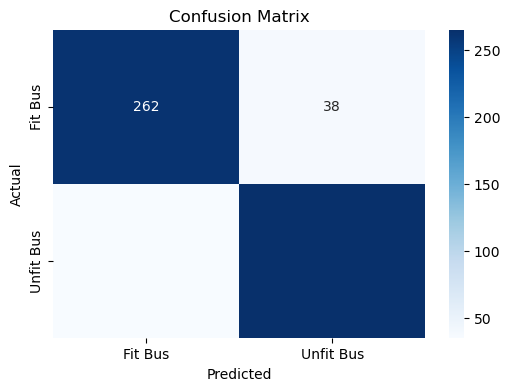

In [ ]:
#Confusion Matrix Visualization with heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Using Pre-trained Models (Transfer Learning):

# Implemantation of VGG16:

# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Base Model VGG16
base_model = VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet')

base_model.trainable = False

# Model Architecture
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
            ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')]

# Training the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=2,
    callbacks=callbacks)

model.save("final_vgg16_model.keras")

# Tesing Model VGG16
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")

In [ ]:
# Implemantation of ResNet50:

# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Base Model (ResNet50)
base_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# Model Architecture
model_resnet50 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_resnet50.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_resnet50.keras', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)]

# Train the Model
history_resnet50 = model_resnet50.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    verbose=2,
    callbacks=callbacks
)
model_resnet50.save("final_resnet50_model.keras")

# Tesing the Model
test_loss, test_acc = model_resnet50.evaluate(validation_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")

In [ ]:
# Implemantation of EfficientNetB0:

# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Base Model EfficientNetB0                              # -------------------------The Best Pretrain Model-------------------------------#
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

# Model Architecture
model_efficientnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_efficientnet.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_efficientnet.keras', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
]

# Train the Model
history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    verbose=2,
    callbacks=callbacks
)

model_efficientnet.save("final_efficientnet_model.keras")

# Tesing the Model
test_loss, test_acc = model_efficientnet.evaluate(validation_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")

In [ ]:
# Implemantation of  InceptionV3:

# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

# Base Model InceptionV3
base_model = InceptionV3(
    input_shape=(299, 299, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# Model Architecture
model_inceptionv3 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_inceptionv3.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_inceptionv3.keras', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
]

# Train the Model
history_inceptionv3 = model_inceptionv3.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=2,
    callbacks=callbacks
)
model_inceptionv3.save("final_inceptionv3_model.keras")

# Tesing the Model
test_loss, test_acc = model_inceptionv3.evaluate(validation_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")

In [ ]:
# Implemantation of  DenseNet-121:

# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Base Model DenseNet121
base_model = DenseNet121(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

# Model Architecture
model_densenet121 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_densenet121.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_densenet121.keras', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
]

# Train the Model
history_densenet121 = model_densenet121.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=2,
    callbacks=callbacks
)
model_densenet121.save("final_densenet121_model.keras")

# Tesing the Model
test_loss, test_acc = model_densenet121.evaluate(validation_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 904ms/step - accuracy: 0.9059 - loss: 0.2050
Test accuracy: 91.67%


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

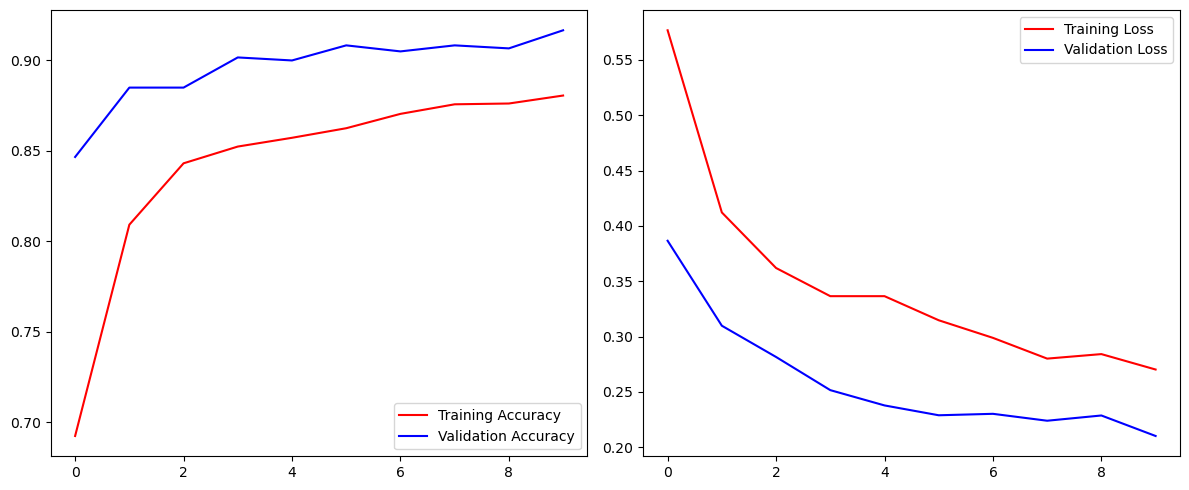

In [ ]:
# Plot training history for analysis

import matplotlib.pyplot as plt
import seaborn as sns

acc = history_densenet121.history['accuracy']
val_acc = history_densenet121.history['val_accuracy']
loss = history_densenet121.history['loss']
val_loss = history_densenet121.history['val_loss']

epochs = range(len(acc))
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x=epochs, y=acc, color='r', label='Training Accuracy', ax=axes[0])
sns.lineplot(x=epochs, y=val_acc, color='b', label='Validation Accuracy', ax=axes[0])
sns.lineplot(x=epochs, y=loss, color='r', label='Training Loss', ax=axes[1])
sns.lineplot(x=epochs, y=val_loss, color='b', label='Validation Loss', ax=axes[1])

plt.tight_layout()
plt.show()

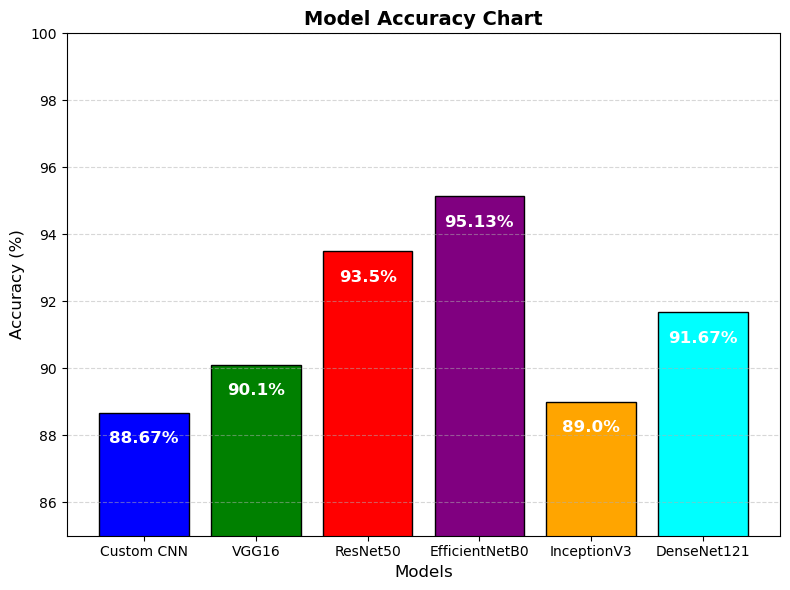

In [ ]:
# Plotting the bar chart to compare all models

import matplotlib.pyplot as plt

models = ['Custom CNN', 'VGG16', 'ResNet50', 'EfficientNetB0', 'InceptionV3', 'DenseNet121']
accuracies = [88.67, 90.10, 93.50, 95.13, 89.00, 91.67]

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1, f"{bar.get_height()}%",
             ha='center', va='bottom', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Chart', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(85, 100)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
